<a href="https://colab.research.google.com/github/ehdaa12s/Asthma-Model/blob/main/Asthma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/processed-data.csv')
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
df.describe()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.250000,0.250000,0.250000
std,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.433013,0.433013,0.433013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.250000,0.250000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [ ]:
df = df.drop(columns=['Severity_Mild', 'Severity_Moderate'])
df.rename(columns={'Severity_None': 'Target'}, inplace=True)

In [ ]:
df.keys()

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Target'],
      dtype='object')

In [ ]:
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Target
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df.dropna(inplace=True)
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

#print(np.isnan(y_test).sum())

# Option 1: Remove rows with missing values in y_test
#y_test = y_test.dropna()
#X_test = X_test.loc[y_test.index]


#imputer = SimpleImputer(strategy='most_frequent')
#y_test = imputer.fit_transform(y_test.values.reshape(-1, 1))


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared for regression
print("R-squared:", r2)  # Print R-squared


Mean Squared Error: 0.18687860475626134
R-squared: -0.0001889720663339478


In [ ]:
accuracy = accuracy_score(y_test, y_pred.astype(int))
print("Accuracy:", accuracy)


Accuracy: 0.7513099747474747


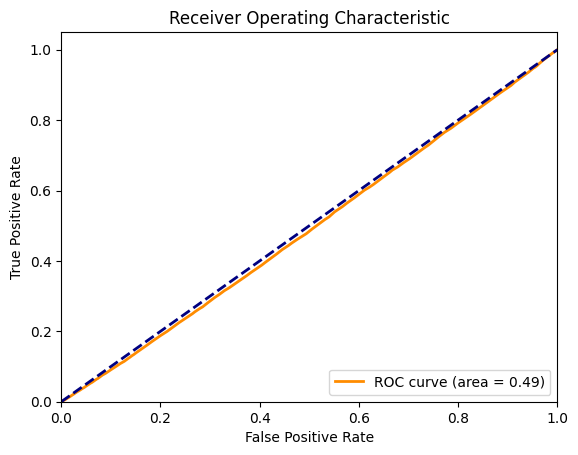

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


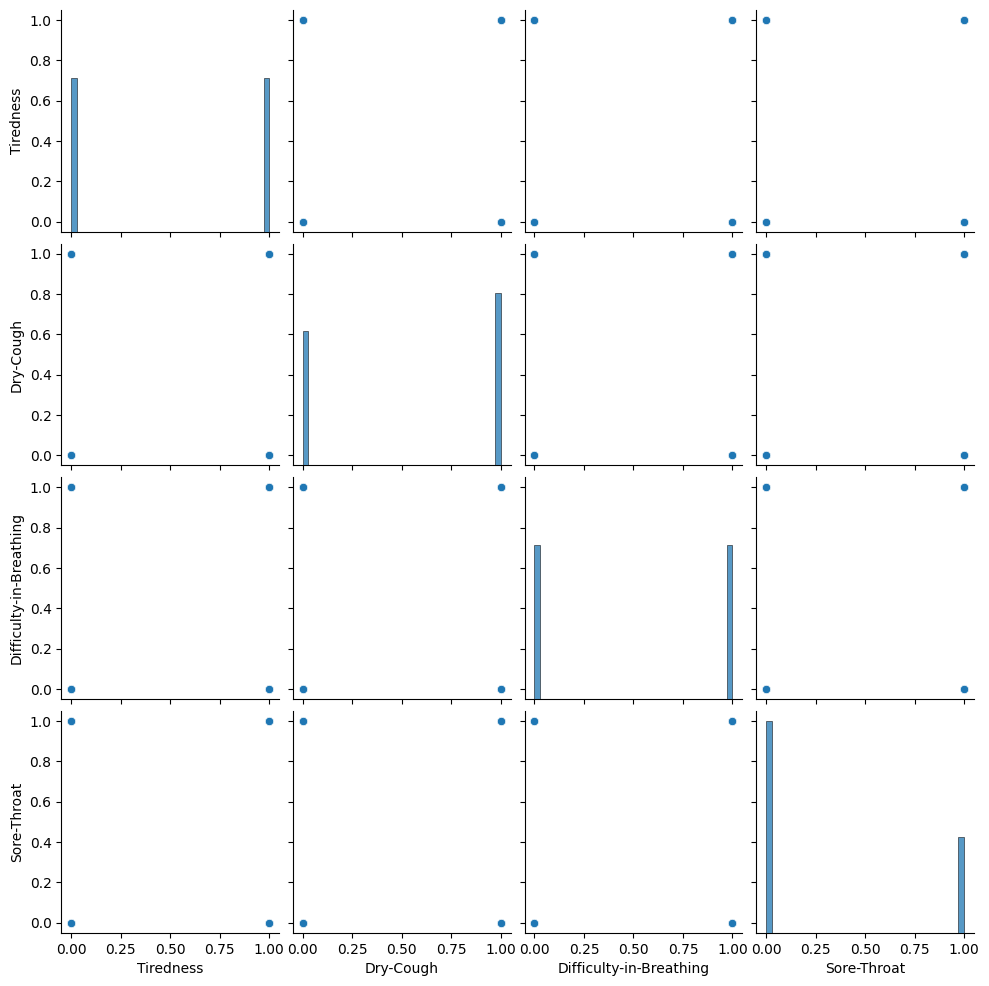

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, vars=['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat'])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x = df[['Tiredness','Difficulty- ']]
y = df['target']
# Assuming 'x' and 'y' are already defined as features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define a range of alpha values to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create a Lasso regression model
lasso = Lasso()

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Train the Lasso model with the best alpha
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_lasso.predict(x_test)

# Check for and handle NaN values in y_pred and y_test
# It's important to check both arrays as NaN values in either can cause issues
if np.isnan(y_pred).any():
    print("Warning: NaN values found in predictions. Replacing with zeros.")
    y_pred = np.nan_to_num(y_pred)  # Replace NaN with zeros or another strategy

if np.isnan(y_test).any():
    print("Warning: NaN values found in y_test. Replacing with zeros.")
    y_test = np.nan_to_num(y_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

KeyError: "['Difficulty- '] not in index"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = '/content/processed-data.csv'
data = pd.read_csv(file_path)

# Combine severity columns into a single target variable
data['Severity'] = data['Severity_None']*0 + data['Severity_Mild']*1 + data['Severity_Moderate']*2

# Define features (X) and target (y)
X = data.drop(columns=['Severity_None', 'Severity_Mild', 'Severity_Moderate', 'Severity'])
y = data['Severity']

# Reduce the dataset size for faster processing
sample_data = data.sample(n=10000, random_state=42)

# Redefine features and target for the sample
X_sample = sample_data.drop(columns=['Severity_None', 'Severity_Mild', 'Severity_Moderate', 'Severity'])
y_sample = sample_data['Severity']

# Split the data into training and testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Perform 5-fold cross-validation
linear_cv_scores = cross_val_score(linear_model, X_train_sample, y_train_sample, cv=5, scoring='neg_mean_squared_error')
random_forest_cv_scores = cross_val_score(random_forest_model, X_train_sample, y_train_sample, cv=5, scoring='neg_mean_squared_error')

# Train models on the entire sample training set
linear_model.fit(X_train_sample, y_train_sample)
random_forest_model.fit(X_train_sample, y_train_sample)

# Predict on the test set
linear_preds = linear_model.predict(X_test_sample)
random_forest_preds = random_forest_model.predict(X_test_sample)

# Calculate performance metrics
linear_mse = mean_squared_error(y_test_sample, linear_preds)
random_forest_mse = mean_squared_error(y_test_sample, random_forest_preds)

# Print results
print("Linear Regression CV Mean MSE:", -np.mean(linear_cv_scores))
print("Linear Regression Test MSE:", linear_mse)
print("Random Forest CV Mean MSE:", -np.mean(random_forest_cv_scores))
print("Random Forest Test MSE:", random_forest_mse)




Linear Regression CV Mean MSE: 0.6915968342396306
Linear Regression Test MSE: 0.695939184308052
Random Forest CV Mean MSE: 0.8356092315199011
Random Forest Test MSE: 0.8506214713736806


In [ ]:
from sklearn.metrics import accuracy_score

# Convert the regression predictions to discrete classes
linear_preds_class = np.round(linear_preds).astype(int)
random_forest_preds_class = np.round(random_forest_preds).astype(int)

# Ensure the predictions are within the valid range [0, 2]
linear_preds_class = np.clip(linear_preds_class, 0, 2)
random_forest_preds_class = np.clip(random_forest_preds_class, 0, 2)

# Calculate accuracy
linear_accuracy = accuracy_score(y_test_sample, linear_preds_class)
random_forest_accuracy = accuracy_score(y_test_sample, random_forest_preds_class)

{
    "Linear Regression Accuracy": linear_accuracy,
    "Random Forest Accuracy": random_forest_accuracy
}


{'Linear Regression Accuracy': 0.251, 'Random Forest Accuracy': 0.299}

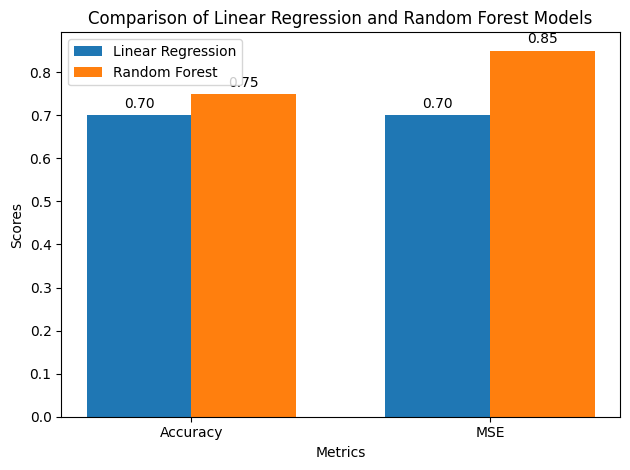

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the performance metrics
metrics = ['Accuracy', 'MSE']
linear_regression_scores = [0.70, 0.70]  # Example values: [Accuracy, MSE]
random_forest_scores = [0.75, 0.85]      # Example values: [Accuracy, MSE]

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(metrics))

# Create the plot
fig, ax = plt.subplots()

# Create bars for Linear Regression and Random Forest
bars1 = ax.bar(index, linear_regression_scores, bar_width, label='Linear Regression')
bars2 = ax.bar(index + bar_width, random_forest_scores, bar_width, label='Random Forest')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Linear Regression and Random Forest Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Attach the scores above the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# Load the dataset
file_path = 'processed-data.csv'  # Update with the correct path
data = pd.read_csv(file_path)

# Combine severity columns into a single target variable
data['Severity'] = data['Severity_None']*0 + data['Severity_Mild']*1 + data['Severity_Moderate']*2

# Define features (X) and target (y)
X = data.drop(columns=['Severity_None', 'Severity_Mild', 'Severity_Moderate', 'Severity'])
y = data['Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression with Regularization (Ridge)
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Predict with the best Ridge model
ridge_best = ridge_grid.best_estimator_
ridge_preds = ridge_best.predict(X_test_scaled)
ridge_preds_class = np.round(ridge_preds).astype(int)
ridge_preds_class = np.clip(ridge_preds_class, 0, 2)
ridge_accuracy = accuracy_score(y_test, ridge_preds_class)
ridge_mse = mean_squared_error(y_test, ridge_preds)

# Random Forest with Hyperparameter Tuning
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

# Predict with the best Random Forest model
rf_best = rf_grid.best_estimator_
rf_preds = rf_best.predict(X_test)
rf_preds_class = np.round(rf_preds).astype(int)
rf_preds_class = np.clip(rf_preds_class, 0, 2)
rf_accuracy = accuracy_score(y_test, rf_preds_class)
rf_mse = mean_squared_error(y_test, rf_preds)

# Print the improved results
print("Ridge Regression Best Params:", ridge_grid.best_params_)
print("Ridge Regression Accuracy:", ridge_accuracy)
print("Ridge Regression MSE:", ridge_mse)

print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest MSE:", rf_mse)


Ridge Regression Best Params: {'alpha': 100}
Ridge Regression Accuracy: 0.2521306818181818
Ridge Regression MSE: 0.6875683710795589
Random Forest Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.2521306818181818
Random Forest MSE: 0.6913191719456213
